In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import model_selection, svm, metrics, neighbors, linear_model, tree, ensemble
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import itertools
from sklearn.decomposition import PCA

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 

def load_file(file_name):
    with open(file_name, 'rb') as file:
        return np.load(file)        

In [3]:
folder_save = '../dataset'
scaled_matrix = load_file(f"{folder_save}/scale_matrix.npy")

In [4]:
selected_customers = pd.read_csv('../dataset/selected_customers.csv')

# Phân cụm khách hàng

### Tìm số lượng cụm

In [5]:
silhouette_values = []

for n_clusters in range(3,15):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(scaled_matrix)
    clusters = kmeans.predict(scaled_matrix)
    silhouette_avg = silhouette_score(scaled_matrix, clusters)
    silhouette_values.append(silhouette_avg)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.12645533266512307
For n_clusters = 4 The average silhouette_score is : 0.13713689423547604
For n_clusters = 5 The average silhouette_score is : 0.15155151586600224
For n_clusters = 6 The average silhouette_score is : 0.1475642282950337
For n_clusters = 7 The average silhouette_score is : 0.17322763201215585
For n_clusters = 8 The average silhouette_score is : 0.18347439687628528
For n_clusters = 9 The average silhouette_score is : 0.19164886113277105
For n_clusters = 10 The average silhouette_score is : 0.17887468591316907
For n_clusters = 11 The average silhouette_score is : 0.1891002366822199
For n_clusters = 12 The average silhouette_score is : 0.18731975066252754
For n_clusters = 13 The average silhouette_score is : 0.1781737543259793
For n_clusters = 14 The average silhouette_score is : 0.18370561547497588


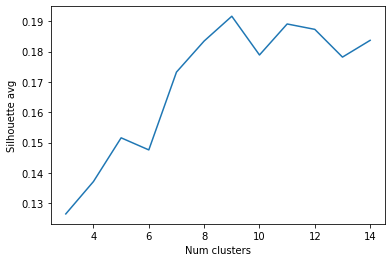

In [6]:
plt.plot(list(range(3,15)), silhouette_values)
plt.xlabel("Num clusters")
plt.ylabel("Silhouette avg")
plt.show()

### Chọn số lượng cụm là 9

In [7]:
n_clusters = 9
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('score for silhouette {:<.3f}'.format(silhouette_avg))

score for silhouette 0.191


In [8]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['Number of values']).T

,1,0,4,2,8,3,7,5,6
Number of values,232,167,163,114,100,97,79,9,2


### Đánh giá chất lượng của phân tách thông qua các điểm Silouhette trong các cụm khác nhau

In [9]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)

        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))

        y_lower = y_upper + 10  

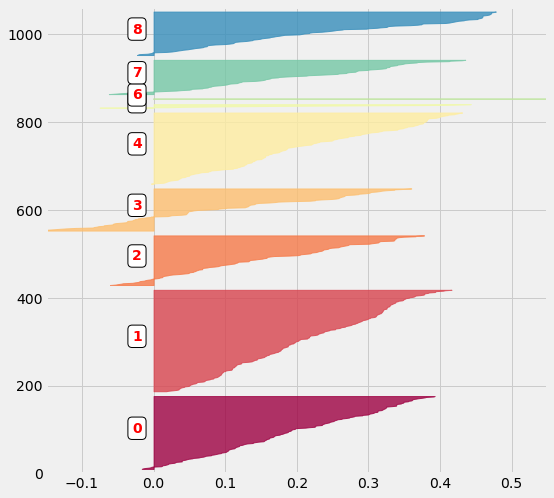

In [10]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)

graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

In [18]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

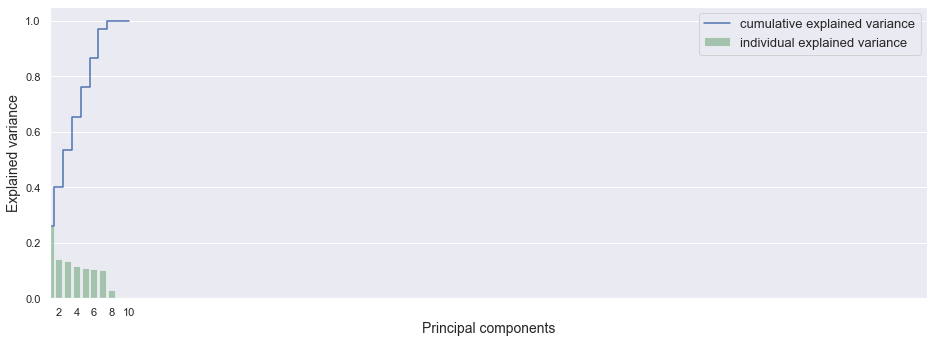

In [22]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(scaled_matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,scaled_matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper right', fontsize = 13);

In [24]:
pca = PCA(n_components=7)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

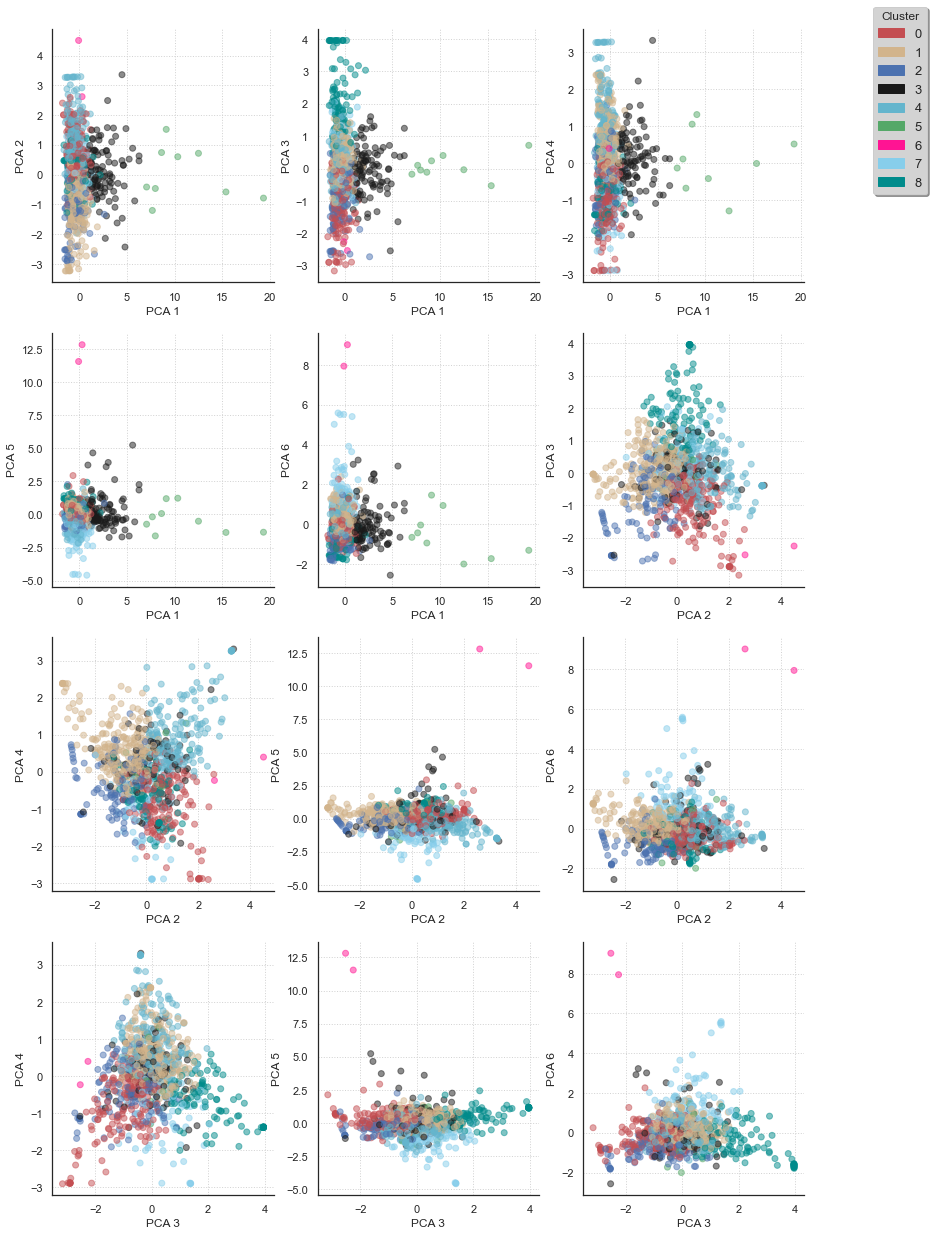

In [29]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,20))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
#_______________________________________________
# I set the legend: abreviation -> airline name
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

# Hình thái khách hàng

In [31]:
selected_customers.loc[:, 'cluster'] = clusters_clients
selected_customers

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,LastPurchase,FirstPurchase,cluster
0,12347.0,1,711.79,711.79,711.790,711.79,17.482684,3.287486,11.716939,26.299892,38.051954,3.161045,33,33,3
1,12348.0,1,652.80,652.80,652.800,652.80,0.000000,73.345588,0.000000,26.654412,0.000000,0.000000,24,24,2
2,12370.0,2,157.20,1587.07,872.135,1744.27,7.157722,9.958321,32.830353,35.958883,11.775700,2.319022,23,26,3
3,12377.0,1,1001.52,1001.52,1001.520,1001.52,0.000000,9.837048,21.926671,32.710280,35.526000,0.000000,20,20,3
4,12383.0,1,543.72,543.72,543.720,543.72,0.000000,41.679541,0.000000,39.174575,8.717722,10.428162,18,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,18245.0,1,365.73,365.73,365.730,365.73,0.000000,34.118065,13.124436,33.549340,19.208159,0.000000,21,21,2
959,18259.0,1,376.30,376.30,376.300,376.30,0.000000,0.000000,21.445655,13.393569,65.160776,0.000000,32,32,4
960,18260.0,2,230.70,538.82,384.760,769.52,9.278511,18.832519,26.003223,28.474893,3.859549,13.551305,0,24,1
961,18269.0,1,138.90,138.90,138.900,138.90,0.000000,14.686825,0.000000,28.509719,56.803456,0.000000,32,32,4


In [32]:
merged_df = pd.DataFrame()
for i in range(n_clusters):
    test = pd.DataFrame(selected_customers[selected_customers['cluster'] == i].mean())
    test = test.T.set_index('cluster', drop = True)
    test['size'] = selected_customers[selected_customers['cluster'] == i].shape[0]
    merged_df = pd.concat([merged_df, test])
#_____________________________________________________
merged_df.drop('CustomerID', axis = 1, inplace = True)
print('number of customers:', merged_df['size'].sum())

merged_df = merged_df.sort_values('sum')

number of customers: 963


In [33]:
liste_index = []
for i in range(6):
    column = 'categ_{}'.format(i)
    liste_index.append(merged_df[merged_df[column] == merged_df[column].max()].index.values[0])

liste_index_reordered = liste_index
liste_index_reordered += [ s for s in merged_df.index if s not in liste_index]

In [34]:
merged_df = merged_df.reindex(index = liste_index_reordered)
merged_df = merged_df.reset_index(drop = False)
merged_df[['cluster', 'count', 'min', 'max', 'mean', 'sum', 'categ_0','categ_1', 'categ_2', 'categ_3', 'categ_4','categ_5', 'size']]

,cluster,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,categ_5,size
0,0.0,1.628743,232.697485,308.840838,271.080973,446.108443,41.343457,12.506812,13.624193,14.185794,13.721233,4.714938,167
1,2.0,1.403509,205.358684,267.414561,232.361617,346.184474,9.549967,44.920475,14.591294,18.122175,8.853387,3.962701,114
2,8.0,1.370000,202.958600,271.233900,237.316975,339.132700,6.241889,5.383510,60.930600,12.895802,7.585957,6.962242,100
3,1.0,1.448276,233.299741,288.773319,260.848766,374.114741,8.823200,13.047904,18.275517,43.005279,12.006002,4.892780,232
4,4.0,1.613497,203.016319,298.482883,246.043145,423.345828,9.860508,7.948114,16.894108,13.203389,47.324388,4.846647,163
5,7.0,1.329114,254.921392,280.746835,266.831118,340.503038,9.222862,12.170169,14.755034,14.909471,11.344767,37.602569,79
6,3.0,2.288660,661.161959,1160.189278,866.227390,1894.908660,13.553371,15.588342,20.761473,22.598604,19.440766,8.057444,97
7,5.0,1.666667,2157.394444,3083.691111,2606.804444,4169.980000,11.512982,14.812885,17.453344,25.768840,15.349785,15.102165,9
8,6.0,35.500000,11.575000,505.625000,127.929829,4525.385000,21.762130,9.545792,21.126246,20.613296,24.853672,2.098863,2


### Phân tích tính chất của từng cụm thông qua biểu đồ Rada

In [35]:
def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    d = data[0]
    return [(d - y1) / (y2 - y1) * (x2 - x1) + x1 for d, (y1, y2) in zip(data, ranges)]

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels = 6):

        angles = np.arange(0, 360, 360./len(variables))

        ix, iy = location[:] ; size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar = True, 
        label = "axes{}".format(i)) for i in range(len(variables))]

        _, text = axes[0].set_thetagrids(angles, labels = variables)
        
        for txt, angle in zip(text, angles):
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i],num = n_ordinate_levels)
            grid_label = [""]+["{:.0f}".format(x) for x in grid[1:-1]]
            ax.set_rgrids(grid[:-1], labels = grid_label, angle = angles[i])
            ax.set_ylim(*ranges[i])
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.9, 1, title, transform = self.ax.transAxes, *args, **kw)

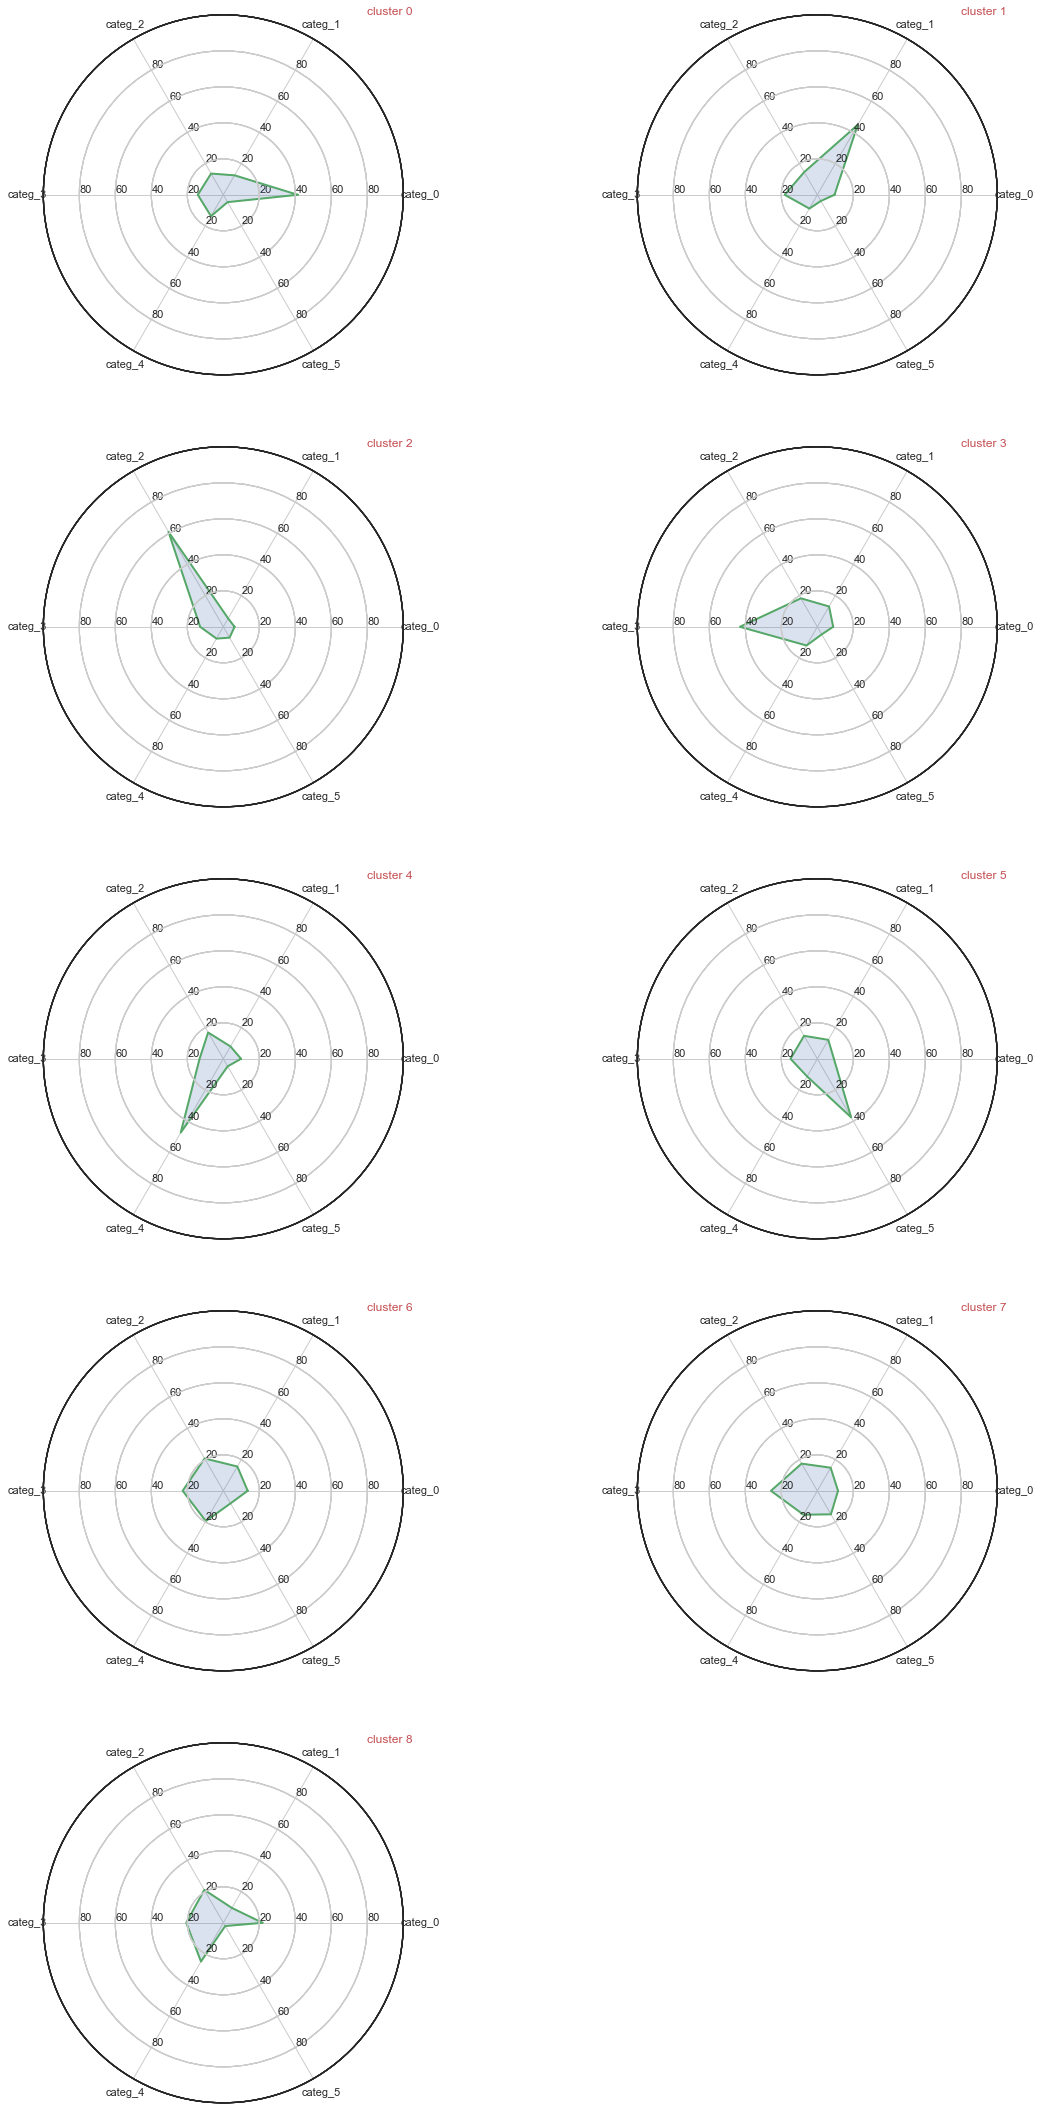

In [36]:
fig = plt.figure(figsize=(15,20))

# attributes = ['count', 'mean', 'sum', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4']
# ranges = [[0.01, 10], [0.01, 3000], [0.01, 6000], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75], [0.01, 75]]

attributes = ['categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4','categ_5']
ranges = [[0.01, 100], [0.01, 100], [0.01, 100], [0.01, 100], [0.01, 100],[0.01, 100]]
index  = [0, 1, 2, 3, 4, 5, 6, 7,8]

n_groups = n_clusters ; i_cols = 2
i_rows = n_groups//i_cols
size_x, size_y = (1/i_cols), (1/i_rows)

for ind in range(n_clusters):
    ix = ind%2 ; iy = i_rows - ind//2
    pos_x = ix*(size_x + 0.05) ; pos_y = iy*(size_y + 0.05)            
    location = [pos_x, pos_y]  ; sizes = [size_x, size_y] 
    data = np.array(merged_df.loc[index[ind], attributes])
    radar = RadarChart(fig, location, sizes, attributes, ranges)
    radar.plot(data, color = 'g', linewidth=2.0)
    radar.fill(data, alpha = 0.2, color = 'b')
    radar.title(title = 'cluster {}'.format(index[ind]), color = 'r')
    ind += 1 

In [67]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))

In [68]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4','categ_5' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

In [69]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

In [70]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## KNN

In [73]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 72.02 % 


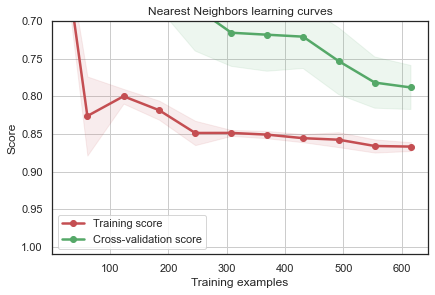

In [74]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Decision Tree

In [75]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 84.46 % 


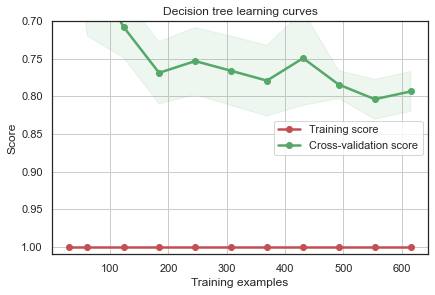

In [76]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Random forest

In [80]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 89.64 % 


In [81]:
rf.grid.best_estimator_

RandomForestClassifier(max_features='sqrt', n_estimators=20)

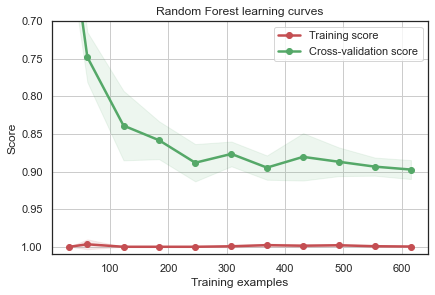

In [82]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

## Gradient Boosting

In [83]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 87.56 % 


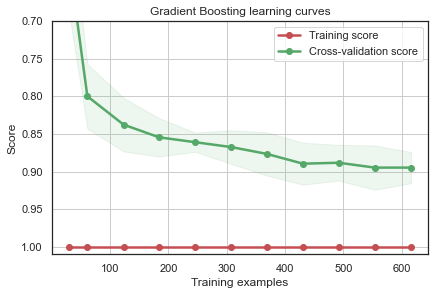

In [84]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [85]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)

In [86]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best),
                                                ('knn', knn_best)], voting='soft')  

In [87]:
votingC = votingC.fit(X_train, Y_train)

In [88]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 90.16 % 


In [89]:
import pickle

In [90]:
def save_model(model_name,model):
    with open(f'../weight_model/{model_name}.pkl','wb') as f:
        pickle.dump(model,f)

In [91]:
save_model('votingC',votingC)

In [92]:
def save_csv(file_name,data):
    data.to_csv(f'../dataset/{file_name}.csv',index=False)

In [93]:
save_csv('X_train',X_train)
save_csv('Y_train',Y_train)
save_csv('X_test',X_test)
save_csv('Y_test',Y_test)